In [2]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58889256/58889256 [==============================] - 1s 0us/step


In [3]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
base_model.trainable = False

In [5]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
model.compile(optimizer="adam",loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [5]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/SPL/fruits-360/Training', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/SPL/fruits-360/Test', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 3355 images belonging to 131 classes.
Found 0 images belonging to 131 classes.


In [18]:
model.fit(train_it, steps_per_epoch=5, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
5/5 [==============================] - 29s 5s/step - loss: -1055.3877 - binary_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 26s 4s/step - loss: -1712.2188 - binary_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 23s 4s/step - loss: -2201.6616 - binary_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 25s 5s/step - loss: -2981.6631 - binary_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 20s 4s/step - loss: -3321.6160 - binary_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 24s 4s/step - loss: -4026.0808 - binary_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 23s 4s/step - loss: -4724.7251 - binary_accuracy: 0.0000e+00
Epoch 8/10
5/5 [==============================] - 24s 4s/step - loss: -5140.2827 - binary_accuracy: 0.0000e+00
Epoch 9/10
5/5 [==============================] - 24s 5s/step - loss: -6202.9170 - binary_accuracy: 0.0000e+00
E

In [19]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

1/1 [==============================] - 1s 659ms/step


array([[91.52601]], dtype=float32)

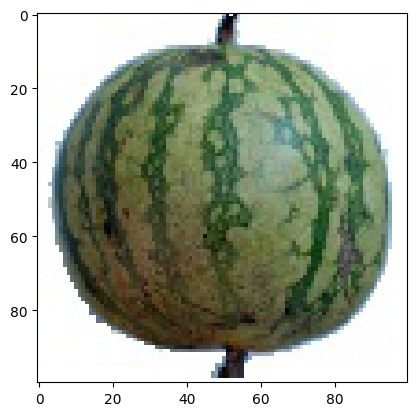

In [27]:
make_predictions('/content/drive/MyDrive/SPL/fruits-360/Training/Watermelon/5_100.jpg')

1/1 [==============================] - 1s 1s/step


array([[65.53513]], dtype=float32)

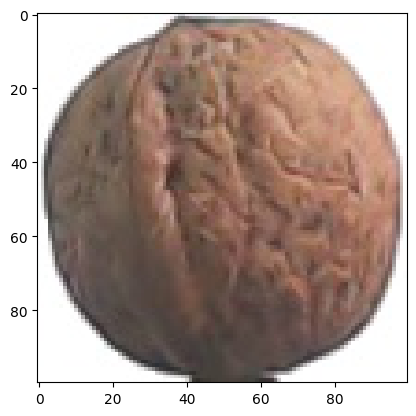

In [26]:
make_predictions('/content/drive/MyDrive/SPL/fruits-360/Training/Walnut/0_100.jpg')

In [31]:
def fruits_checker(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Walnut! Let him in!")
    else:
        print("That's not Walnut! Stay out!")

Let's try it out!

1/1 [==============================] - 0s 475ms/step
That's not Walnut! Stay out!


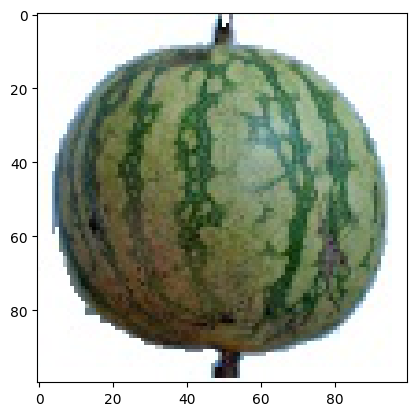

In [32]:
fruits_checker('/content/drive/MyDrive/SPL/fruits-360/Training/Watermelon/11_100.jpg')

In [ ]:
from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(100, 100, 3)


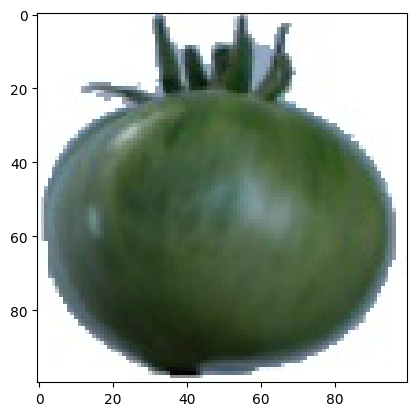

In [ ]:
show_image("/content/drive/MyDrive/SPL/fruits-360/Training/Tomato not Ripened/4_100.jpg")

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [ ]:
processed_image = load_and_process_image("/content/drive/MyDrive/SPL/fruits-360/Training/Tomato not Ripened/4_100.jpg")

Original image shape:  (100, 100, 3)
Processed image shape:  (1, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
   show_image(image_path)
    # Load and pre-process image
   image = load_and_process_image(image_path)
    # Make predictions
   predictions = model.predict(image)
    # Print predictions in readable form
   print('Predicted:', decode_predictions(predictions, top=3))

(100, 100, 3)
Original image shape:  (100, 100, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 0us/step
Predicted: [[('n04023962', 'punching_bag', 0.5045469), ('n02782093', 'balloon', 0.1490795), ('n03720891', 'maraca', 0.07465973)]]


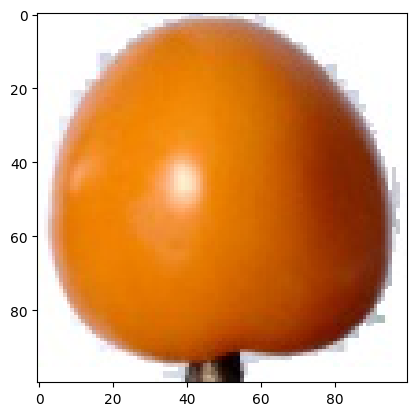

In [ ]:
readable_prediction("/content/drive/MyDrive/SPL/fruits-360/Training/Tomato Yellow/6_100.jpg")

(100, 100, 3)
Original image shape:  (100, 100, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 411ms/step
Predicted: [[('n07720875', 'bell_pepper', 0.5522136), ('n12768682', 'buckeye', 0.15925394), ('n03676483', 'lipstick', 0.041963324)]]


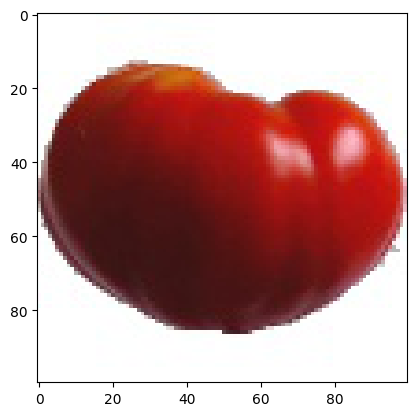

In [ ]:
readable_prediction("/content/drive/MyDrive/SPL/fruits-360/Training/Tomato 3/1_100.jpg")

(100, 100, 3)
Original image shape:  (100, 100, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 440ms/step
Predicted: [[('n07720875', 'bell_pepper', 0.48075625), ('n03676483', 'lipstick', 0.305617), ('n04023962', 'punching_bag', 0.0886703)]]


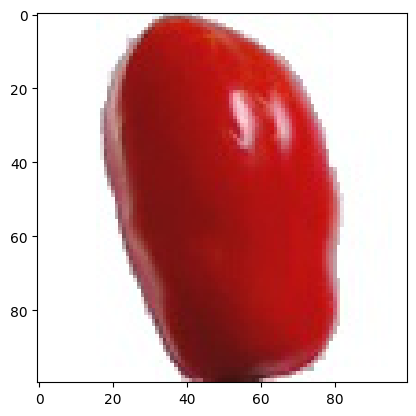

In [ ]:
readable_prediction("/content/drive/MyDrive/SPL/fruits-360/Training/Tomato 2/2_100.jpg")

In [ ]:
import numpy as np

def Watermelon_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Watermelon come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Walnut stay inside!")
    else:
        print("You're not a watermelon! Stay outside!")

(100, 100, 3)
Original image shape:  (100, 100, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 407ms/step
You're not a watermelon! Stay outside!


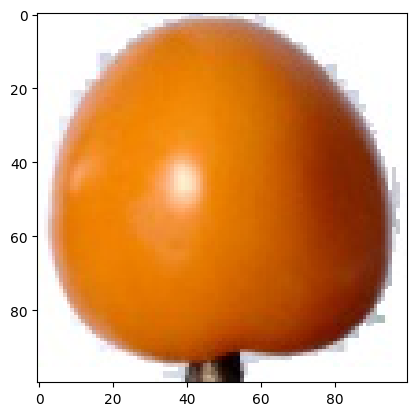

In [ ]:
Watermelon_door("/content/drive/MyDrive/SPL/fruits-360/Training/Tomato Yellow/6_100.jpg")

(100, 100, 3)
Original image shape:  (100, 100, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 407ms/step
You're not a watermelon! Stay outside!


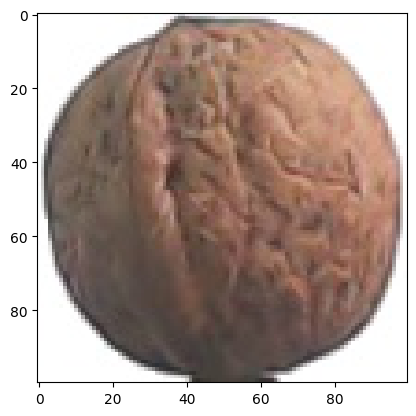

In [ ]:
Watermelon_door("/content/drive/MyDrive/SPL/fruits-360/Training/Walnut/0_100.jpg")